# Mean Filter 

Mean Filters are used in image processing to denoise, smooth, and blur images

### Required Libraries

1. Python
2. numpy
3. PIL
4. cv2
5. matplotlib

In [55]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Image Source: http://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

im = Image.open('gaussian1.gif')
noised_image = np.asarray(im)

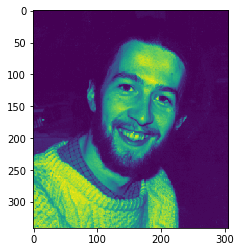

In [56]:
%matplotlib inline
plt.imshow(np.stack((re,)*3, axis=-1)noised_image)
plt.show()

In [57]:
# Check the noised image by downloading 
im.save("test.gif")

In [58]:
# Mean filter function:

def mean_filter(image, num):
    
    """
    image - input noisy image
    num - the shape of num*num square kernel
    """ 
    boundary = num//2
    w = image.shape[0]
    h = image.shape[1]    
    result = np.zeros((w,h))
    for i in range(0, w):
        for j in range(0,h):
            if i-boundary < 0 or i + boundary >= w or j-boundary < 0 or j + boundary >= h:
                result[i][j] = image[i][j]
            else:
                neighbours = []
                for z in range(-boundary,boundary+1):
                    neighbours.append(image[i+z][j])
                    neighbours.append(image[i][j+z])
                    neighbours.append(image[i+z][j+z])
                result[i][j] = sum(neighbours)//9
                
    return result

In [59]:
# Run the mean_filter function on 
re = mean_filter(noised_image,3)

# Stacking the image grayscale with 3 channels
re = np.uint8(re)
result_image = np.stack((re,)*3, axis=-1)

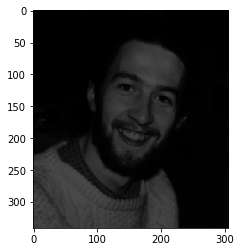

In [60]:
plt.imshow(result_image)

In [61]:
# Storing the denoised and smoothed image
im1 = Image.fromarray(result_image)
im1.save("result.gif")

### Applying Mean Filter with a 5*5 Kernrl

In [62]:
# 
re1 = mean_filter(noised_image,5)
re1 = np.uint8(re)
result_image1 = np.stack((re1,)*3, axis=-1)

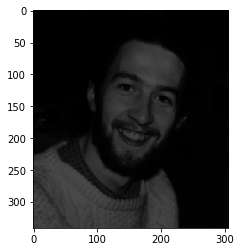

In [63]:
plt.imshow(result_image1)